In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from linearmodels import PanelOLS
import matplotlib.pyplot as plt

In [2]:
dft = pd.read_csv('tae.csv', encoding = "ISO-8859-1")
df = pd.read_csv('topandas.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,id,player,start,country,name,dob,team,tour,end,...,cumelo,intage,std,mean,normal,quarterattour,intage2,start2,ageattoursq,id_effect
0,0,0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,...,-10.310471,19,17.584629,2.123740,-0.707107,19,361,14dec2016,51566760,-35.324879
1,1,0,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,...,14.557951,20,17.584629,2.123740,0.707107,20,400,02may2017,53582400,-35.324879
2,4,1,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,...,50.786907,21,35.513512,84.585602,-0.951714,21,441,15aug2014,63186600,-45.084911
3,6,1,BzzIsPerfect,2014-08-25,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,Megafon Battle Arena,2014-08-26,...,49.818428,21,35.513512,84.585602,-0.978984,21,441,25aug2014,63345680,-45.084911
4,3,1,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,...,120.474010,21,35.513512,84.585602,1.010556,21,441,06oct2014,64016000,-45.084911


In [4]:
df = df.drop(['v1', 'elo32diff', 'intage', 'std', 'mean', 'quarterattour', 'intage2', 'start2', 'ageattoursq'], axis=1)

In [5]:
for player in df.player.unique():
    try:
        dfid = pd.DataFrame(df[df['player'] == player].tour.unique()).reset_index().rename(columns={'index': 'exp', 0: 'tour'})
        dfid['player'] = player
        dfid2 = pd.concat([dfid2, dfid])
    except NameError:
        dfid2 = dfid
        continue

In [6]:
df = pd.merge(df, dfid2, how='left', on=['player', 'tour'])
df = df.drop_duplicates().reset_index().drop(['index'], axis=1)

In [7]:
df.head()

,id,player,start,country,name,dob,team,tour,end,ageattour,cumelo,normal,id_effect,exp
0,0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,7181,-10.310471,-0.707107,-35.324879,0
1,0,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,7320,14.557951,0.707107,-35.324879,1
2,1,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,7949,50.786907,-0.951714,-45.084911,0
3,1,BzzIsPerfect,2014-08-25,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,Megafon Battle Arena,2014-08-26,7959,49.818428,-0.978984,-45.084911,1
4,1,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,8001,120.474010,1.010556,-45.084911,2


In [8]:
dft = dft[['player', 'role']]
dft = dft.groupby('player').mean()
dft.reset_index(inplace=True)
dft.head()

,player,role
0,.Ark,1
1,13abyKnight,1
2,33,2
3,4DR,1
4,7ckngMad,2


In [9]:
df = pd.merge(df, dft, how='left', on=['player'])
df.head()

,id,player,start,country,name,dob,team,tour,end,ageattour,cumelo,normal,id_effect,exp,role
0,0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,7181,-10.310471,-0.707107,-35.324879,0,2.0
1,0,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,7320,14.557951,0.707107,-35.324879,1,2.0
2,1,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,7949,50.786907,-0.951714,-45.084911,0,1.0
3,1,BzzIsPerfect,2014-08-25,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,Megafon Battle Arena,2014-08-26,7959,49.818428,-0.978984,-45.084911,1,1.0
4,1,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,8001,120.474010,1.010556,-45.084911,2,1.0


In [10]:
df.start = pd.to_datetime(df['start'])

In [11]:
df = df.set_index(['id', 'start'])
df.head()

player country               name         dob  \
id start                                                             
0  2016-12-14            33  Israel       Neta Shapira  1997-04-17   
   2017-05-02            33  Israel       Neta Shapira  1997-04-17   
1  2014-08-15  BzzIsPerfect  Russia  Stanislav Glushan  1992-11-09   
   2014-08-25  BzzIsPerfect  Russia  Stanislav Glushan  1992-11-09   
   2014-10-06  BzzIsPerfect  Russia  Stanislav Glushan  1992-11-09   

                         team                             tour         end  \
id start                                                                     
0  2016-12-14  Prodota Gaming           World Cyber Arena 2016  2016-12-16   
   2017-05-02  Prodota Gaming      Mr. Cat Invitational Europe  2017-05-18   
1  2014-08-15      Virtus.Pro  StarLadder StarSeries Season 10  2014-10-26   
   2014-08-25      Virtus.Pro             Megafon Battle Arena  2014-08-26   
   2014-10-06      Virtus.pro    ASUS ROG DreamLeague Season 2  2014-11-29   

               ageattour      cumelo    normal  id_effect  exp  role  
id start                                                              
0  2016-12-14       7181  -10.310471 -0.707107 -35.324879    0   2.0  
   2017-05-02       7320   14.557951  0.707107 -35.324879    1   2.0  
1  2014-08-15       7949   50.786907 -0.951714 -45.084911    0   1.0  
   2014-08-25       7959   49.818428 -0.978984 -45.084911    1   1.0  
   2014-10-06       8001  120.474010  1.010556 -45.084911    2   1.0

In [12]:
r1 = df[df['role'] == 1]
r2 = df[df['role'] == 2]

In [13]:
r1 = r1.rename(columns={'ageattour': 'age'})
r2 = r2.rename(columns={'ageattour': 'age'})

In [14]:
rs = [r1, r2]
for r in rs:
    r['agesq'] = r['age'] * r['age']
    r['expsq'] = r['exp'] * r['exp']
    r['logexp'] = np.add(r.exp, 1).apply(np.log)
    r['fixelo'] = r['cumelo'] + r['id_effect']
    r['const'] = 1

In [15]:
r1.head()

player country               name         dob  \
id start                                                             
1  2014-08-15  BzzIsPerfect  Russia  Stanislav Glushan  1992-11-09   
   2014-08-25  BzzIsPerfect  Russia  Stanislav Glushan  1992-11-09   
   2014-10-06  BzzIsPerfect  Russia  Stanislav Glushan  1992-11-09   
   2014-10-31  BzzIsPerfect  Russia  Stanislav Glushan  1992-11-09   
   2014-11-01  BzzIsPerfect  Russia  Stanislav Glushan  1992-11-09   

                     team                             tour         end   age  \
id start                                                                       
1  2014-08-15  Virtus.Pro  StarLadder StarSeries Season 10  2014-10-26  7949   
   2014-08-25  Virtus.Pro             Megafon Battle Arena  2014-08-26  7959   
   2014-10-06  Virtus.pro    ASUS ROG DreamLeague Season 2  2014-11-29  8001   
   2014-10-31  Virtus.pro           XMG Captains Draft 2.0  2014-12-21  8026   
   2014-11-01  Virtus.pro                 MSI Beat IT 2014  2014-11-02  8027   

                   cumelo    normal  id_effect  exp  role     agesq  expsq  \
id start                                                                     
1  2014-08-15   50.786907 -0.951714 -45.084911    0   1.0  63186601      0   
   2014-08-25   49.818428 -0.978984 -45.084911    1   1.0  63345681      1   
   2014-10-06  120.474010  1.010556 -45.084911    2   1.0  64016001      4   
   2014-10-31  121.803080  1.047981 -45.084911    3   1.0  64416676      9   
   2014-11-01   80.045586 -0.127839 -45.084911    4   1.0  64432729     16   

                 logexp     fixelo  const  
id start                                   
1  2014-08-15  0.000000   5.701996      1  
   2014-08-25  0.693147   4.733517      1  
   2014-10-06  1.098612  75.389099      1  
   2014-10-31  1.386294  76.718169      1  
   2014-11-01  1.609438  34.960675      1

In [40]:
#CORE
y1 = r1['normal']
x1 = r1[['const', 'age', 'agesq', 'logexp']]
mod = PanelOLS(y1, x1, entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)

In [41]:
res.summary

Dep. Variable:,normal,R-squared:,0.0272
Estimator:,PanelOLS,R-squared (Between):,-144.03
No. Observations:,3084,R-squared (Within):,0.0272
Date:,"Mon, Jan 22 2018",R-squared (Overall):,0.0037
Time:,11:30:06,Log-likelihood,-4254.1
Cov. Estimator:,Clustered,,
,,F-statistic:,27.292
Entities:,264,P-value,0.0000
Avg Obs:,11.682,Distribution:,"F(3,2923)"
Min Obs:,0.0000,,
Max Obs:,72.000,F-statistic (robust):,2.4558


In [47]:
noref = pd.merge(r1.reset_index(), res.estimated_effects.reset_index().rename(columns={'entity': 'id'}), how='left', on=['id'])

In [54]:
noref[['player', 'estimated_effects']].groupby('player').mean().sort_values('estimated_effects', ascending=True)

,estimated_effects
player,
Super,-0.226051
S4,-0.213705
Sylar,-0.200690
Funn1k,-0.189080
Silent,-0.188166
AdmiralBulldog,-0.162696
G,-0.151778
Arteezy,-0.151576
XBOCT,-0.150493


In [19]:
import random
r = lambda: random.randint(0,255)
color = '#%02X%02X%02X' % (r(),r(),r())
print(color)

#31857F


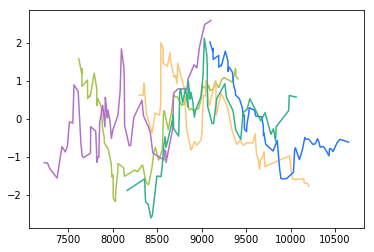

In [60]:
for player in r1.sort_values('exp', ascending=False).player.unique()[:5]:
    r = lambda: random.randint(0,255)
    hex = '#%02X%02X%02X' % (r(),r(),r())
    plt.plot(r1[r1['player'] == player]['age'], r1[r1['player'] == player]['normal'], color=hex)

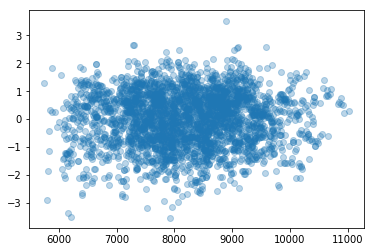

In [32]:
plt.scatter(r1['age'], r1['normal'], alpha=0.3)

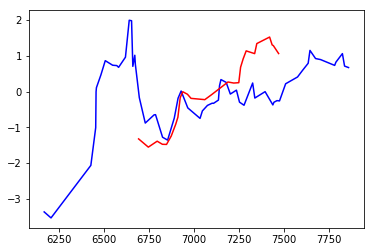

In [29]:
plt.plot(r1[r1['player'] == 'Arteezy']['age'], r1[r1['player'] == 'Arteezy']['normal'], color='b')
plt.plot(r1[r1['player'] == 'Miracle-']['age'], r1[r1['player'] == 'Miracle-']['normal'], color='r')

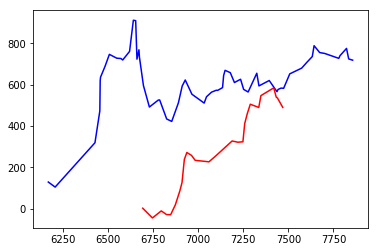

In [28]:
plt.plot(r1[r1['player'] == 'Arteezy']['age'], r1[r1['player'] == 'Arteezy']['cumelo'], color='b')
plt.plot(r1[r1['player'] == 'Miracle-']['age'], r1[r1['player'] == 'Miracle-']['cumelo'], color='r')

In [22]:
#CORE
y2 = r2['cumelo']
x2 = r2[['age', 'agesq', 'logexp']]
mod = PanelOLS(y2, x2, entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)

In [23]:
res.summary

Dep. Variable:,cumelo,R-squared:,0.0853
Estimator:,PanelOLS,R-squared (Between):,-122.12
No. Observations:,2216,R-squared (Within):,0.0853
Date:,"Mon, Jan 22 2018",R-squared (Overall):,-48.426
Time:,11:18:42,Log-likelihood,-1.449e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,65.514
Entities:,265,P-value,0.0000
Avg Obs:,8.3623,Distribution:,"F(3,2107)"
Min Obs:,0.0000,,
Max Obs:,77.000,F-statistic (robust):,3.9057


In [55]:
#SUP
y2 = r2['normal']
x2 = r2[['const', 'age', 'agesq', 'logexp']]
mod = PanelOLS(y2, x2, entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)

res.summary

noref = pd.merge(r2.reset_index(), res.estimated_effects.reset_index().rename(columns={'entity': 'id'}), how='left', on=['id'])

noref[['player', 'estimated_effects']].groupby('player').mean().sort_values('estimated_effects', ascending=True)

,estimated_effects
player,
Puppey,-0.257506
Faith,-0.246972
Akke,-0.206561
Fenrir,-0.204721
Yao,-0.198232
Kaka,-0.189037
EGM,-0.179801
ChuaN,-0.178552
KuroKy,-0.175777
